In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'WELLCOME_APCspend2013_forThinkful.csv', encoding='latin1')

In [3]:
df.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 41.6+ KB


In [5]:
df.isnull().sum()

PMID/PMCID                                             199
Publisher                                                0
Journal title                                            1
Article title                                            0
COST (£) charged to Wellcome (inc VAT when charged)      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
print("The top 5 journals are:")
df['Publisher'].value_counts().head(5)

The top 5 journals are:


Elsevier                     344
Public Library of Science    265
Wiley                        110
Oxford University Press       73
Springer                      72
Name: Publisher, dtype: int64

In [8]:
df.rename(columns={'COST (£) charged to Wellcome (inc VAT when charged)':'Cost'}, inplace=True)

In [26]:
df["Cost"] = df.Cost.replace('\£','',regex=True)

In [27]:
df.Cost.describe()

count        1928
unique       1295
top       2040.00
freq           90
Name: Cost, dtype: object

In [29]:
df["Cost"] = df.Cost.astype(float)

ValueError: could not convert string to float: '1674$'

In [30]:
df["Cost"] = df.Cost.replace('\$','',regex=True)

In [32]:
df["Cost"] = df.Cost.astype(float)

In [33]:
df.Cost.describe()

count      1928.000000
mean      22729.969891
std      142424.454810
min           9.930000
25%        1280.000000
50%        1868.810000
75%        2315.555000
max      999999.000000
Name: Cost, dtype: float64

In [34]:
df.isnull().sum()

PMID/PMCID       0
Publisher        0
Journal title    0
Article title    0
Cost             0
dtype: int64

(array([1.886e+03, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+01]),
 array([9.93000000e+00, 1.00008837e+05, 2.00007744e+05, 3.00006651e+05,
        4.00005558e+05, 5.00004465e+05, 6.00003372e+05, 7.00002279e+05,
        8.00001186e+05, 9.00000093e+05, 9.99999000e+05]),
 <a list of 10 Patch objects>)

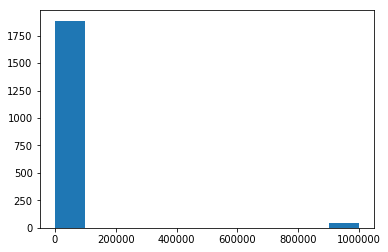

In [36]:
plt.hist(df["Cost"])

In [45]:
df_ = df[df["Cost"]<192645]

In [46]:
df_.Cost.describe()

count    1886.000000
mean     1818.532847
std       760.425648
min         9.930000
25%      1268.700000
50%      1834.770000
75%      2295.325000
max      6000.000000
Name: Cost, dtype: float64

(array([ 46., 395., 472., 715., 150.,  38.,  64.,   4.,   0.,   2.]),
 array([   9.93 ,  608.937, 1207.944, 1806.951, 2405.958, 3004.965,
        3603.972, 4202.979, 4801.986, 5400.993, 6000.   ]),
 <a list of 10 Patch objects>)

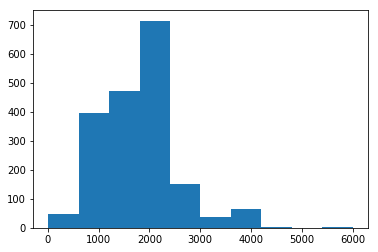

In [47]:
plt.hist(df_["Cost"])

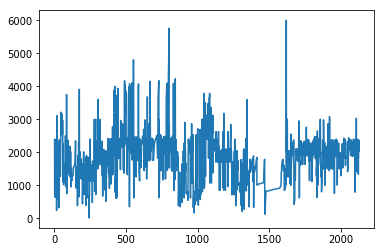

In [48]:
plt.plot(df_["Cost"])